## Exploratory data analysis (EDA)
### Litecoin (LTC)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()

In [2]:
df = pd.read_csv('DATA\\registros_litecoin.csv')
df = df.drop(columns='Unnamed: 0')
df
moneda = 'Litecoin'

##  Analisis General

In [4]:
# Una descripcion general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   time                1826 non-null   object 
 1   price               1826 non-null   float64
 2   market_caps         1826 non-null   float64
 3   total_volumes       1826 non-null   float64
 4   Circulating supply  1826 non-null   float64
dtypes: float64(4), object(1)
memory usage: 71.5+ KB


Se observa que no hay valores faltantes, la fecha esta en tipo object, se cambiara a timestamp

In [5]:
df['time'] = pd.to_datetime(df['time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   time                1826 non-null   datetime64[ns]
 1   price               1826 non-null   float64       
 2   market_caps         1826 non-null   float64       
 3   total_volumes       1826 non-null   float64       
 4   Circulating supply  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 71.5 KB


veamos si hay registros duplicados

In [6]:
df.duplicated().sum()

0

cada registro del dataframe es unico

In [9]:
#ahora veamos unas estadisticas generales del dataframe

df.describe()

,price,market_caps,total_volumes,Circulating supply
count,1826.000000,1.826000e+03,1.826000e+03,1.826000e+03
mean,93.034725,6.248667e+09,2.378347e+09,6.657394e+07
std,56.347542,3.841877e+09,2.417828e+09,4.200379e+06
min,23.064888,1.374538e+09,1.718595e+08,5.795323e+07
25%,53.733824,3.496796e+09,6.018050e+08,6.365898e+07
50%,75.020150,4.909558e+09,1.793112e+09,6.648329e+07
75%,115.139962,7.814936e+09,3.167373e+09,7.034921e+07
max,384.671618,2.567776e+10,1.835039e+10,7.367853e+07


## Analisis univariable
Se hara un boxplot por cada variable en busca de outliers

<Axes: >

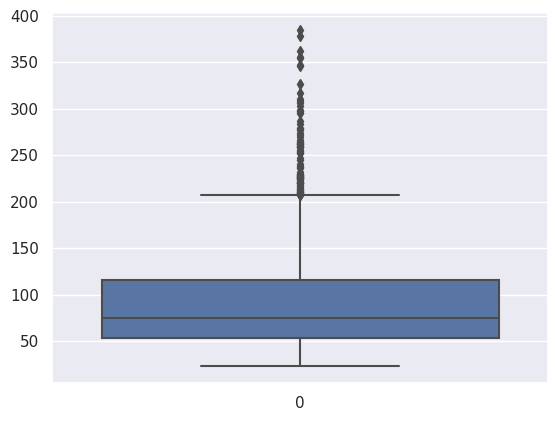

In [10]:
#rangos del precio
sns.boxplot(df['price'])

<Axes: >

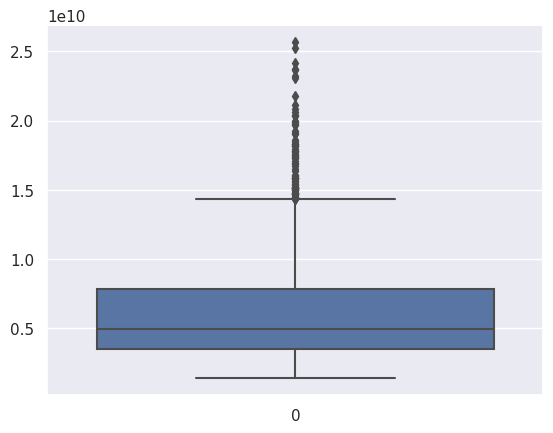

In [11]:
#rango de los capitales de mercado
sns.boxplot(df['market_caps'])

<Axes: >

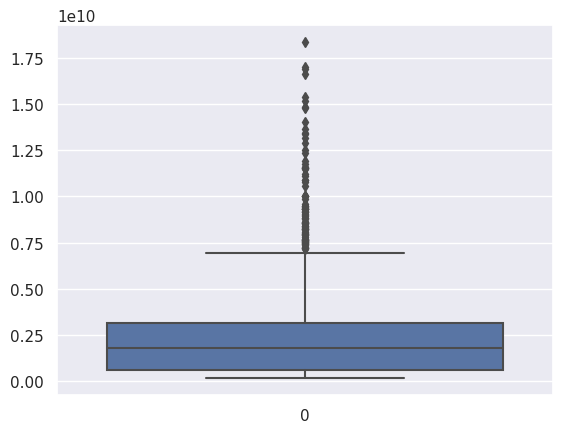

In [12]:
#rango de los volumenes
sns.boxplot(df['total_volumes'])

<Axes: >

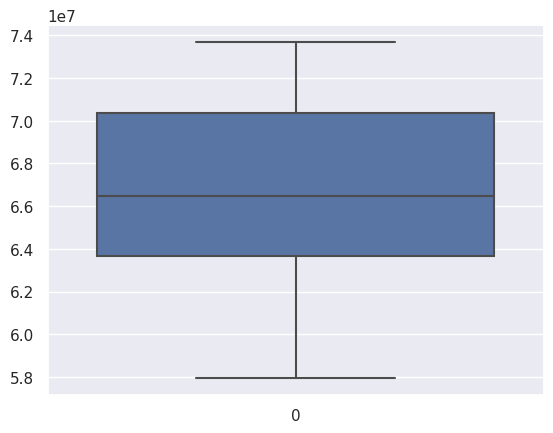

In [13]:
#rango de los tokens en circulacion
sns.boxplot(df['Circulating supply'])

#### *Se observa una cantidad considerable de outliers en la variable* `total_volumes`

Estos outliers representan las anomalias del mercado que ocurrieron en el periodo de tiempo
del dataset, esto es comun es todas las criptos, se ha visto en toda su historia que causas externas
pueden afectar al precio.

#### Con respecto a los outliers en `price` y `market_caps`

como se observa en los grafico de las tendencias de precio
presentados mas adelante, en todos los 5 años de precios registrado
el valor a fluctuado demasiado, estando en algunos momentos en precios
altos y en otros con precios bastante bajos

In [14]:
df['total_volumes'].describe()

count    1.826000e+03
mean     2.378347e+09
std      2.417828e+09
min      1.718595e+08
25%      6.018050e+08
50%      1.793112e+09
75%      3.167373e+09
max      1.835039e+10
Name: total_volumes, dtype: float64

## Analisis multivariable

Text(0.5, 1.0, 'Litecoin Market_cap vs price')

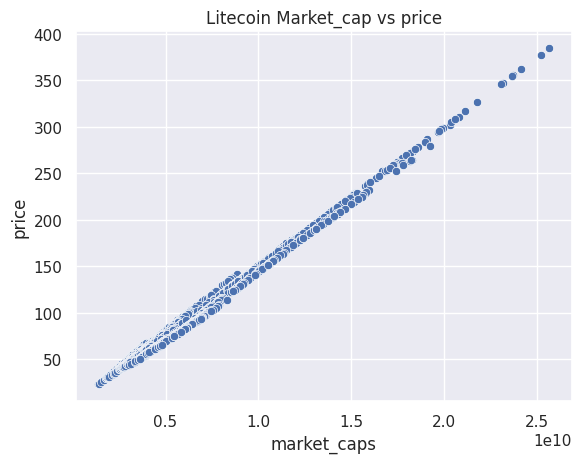

In [15]:
sns.scatterplot(data=df, x='market_caps', y='price').set_title(f'{moneda} Market_cap vs price')

Los precios y capitales de mercado tienen una alta dependencia

#### Hagamos un chequeo general de las relaciones entre las variables

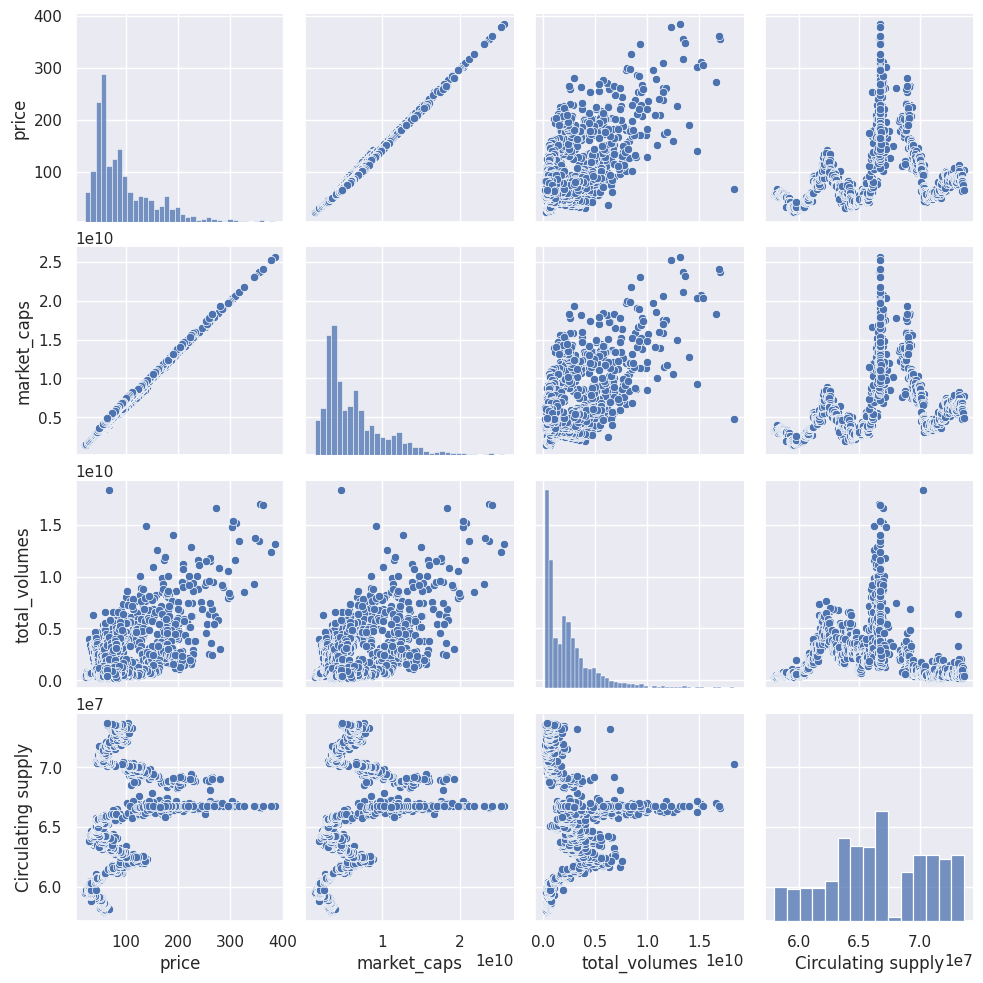

In [16]:
sns.pairplot(df)

## Tendencias del precio

Se analizaran las tendencias de precio de cada año registrado del precio

In [18]:
df1 = df[df['time'] <= '2019-08-22 00:00:00' ]
df1

,time,price,market_caps,total_volumes,Circulating supply
0,2018-08-22,56.463118,3.272220e+09,3.123027e+08,5.795323e+07
1,2018-08-23,55.326816,3.209835e+09,3.930125e+08,5.801590e+07
2,2018-08-24,57.314677,3.323150e+09,3.098590e+08,5.798078e+07
3,2018-08-25,57.850156,3.353849e+09,2.826900e+08,5.797477e+07
4,2018-08-26,57.892066,3.357242e+09,2.590395e+08,5.799140e+07
...,...,...,...,...,...
361,2019-08-18,72.763859,4.587869e+09,2.743641e+09,6.305148e+07
362,2019-08-19,76.285702,4.809379e+09,2.641844e+09,6.304431e+07
363,2019-08-20,77.211530,4.872522e+09,2.773105e+09,6.310614e+07
364,2019-08-21,74.957220,4.727402e+09,2.502518e+09,6.306800e+07


Text(0.5, 1.0, 'Litecoin price 2018-08-22 / 2019-08-22')

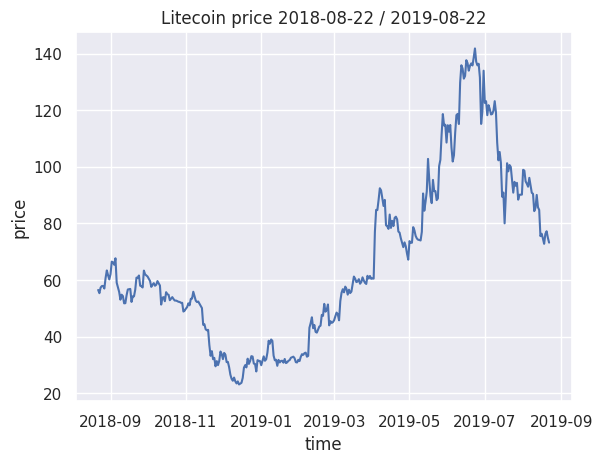

In [19]:
sns.lineplot(data=df1, x='time', y='price').set_title(f'{moneda} price 2018-08-22 / 2019-08-22')

Text(0.5, 1.0, 'Litecoin price 2019-08-22 / 2020-08-22')

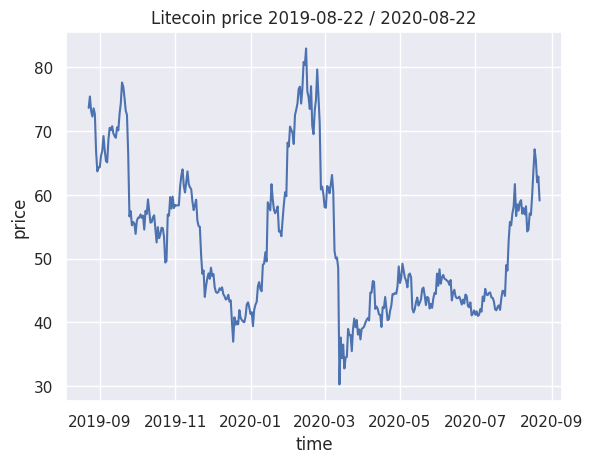

In [20]:
df2 = df[(df['time']> '2019-08-22 00:00:00') & (df['time']<= '2020-08-22 00:00:00')]
sns.lineplot(data=df2, x='time', y='price').set_title(f'{moneda} price 2019-08-22 / 2020-08-22')

Text(0.5, 1.0, 'Litecoin price 2020-08-22 / 2021-08-22')

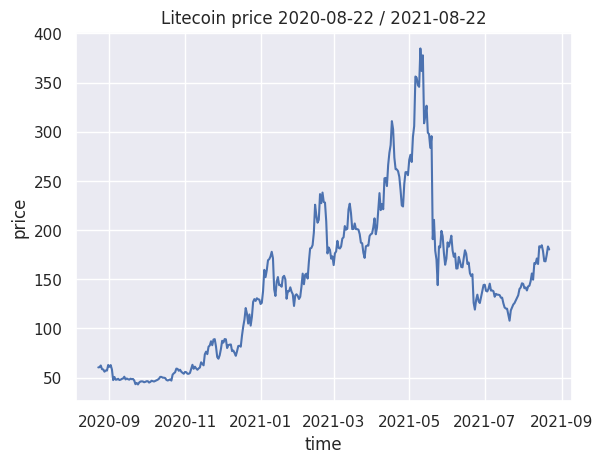

In [21]:
df3 = df[(df['time']> '2020-08-22 00:00:00') & (df['time']<= '2021-08-22 00:00:00')]
sns.lineplot(data=df3, x='time', y='price').set_title(f'{moneda} price 2020-08-22 / 2021-08-22')

Text(0.5, 1.0, 'Litecoin price 2021-08-22 / 2022-08-22')

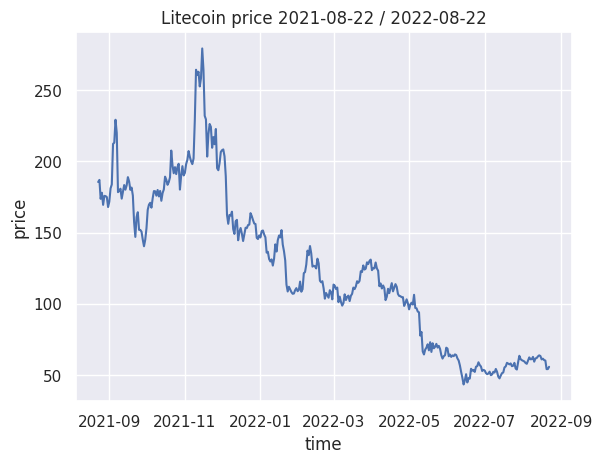

In [22]:
df4 = df[(df['time']> '2021-08-22 00:00:00') & (df['time']<= '2022-08-22 00:00:00')]
sns.lineplot(data=df4, x='time', y='price').set_title(f'{moneda} price 2021-08-22 / 2022-08-22')

Text(0.5, 1.0, 'Litecoin price 2022-08-22 / 2023-08-22')

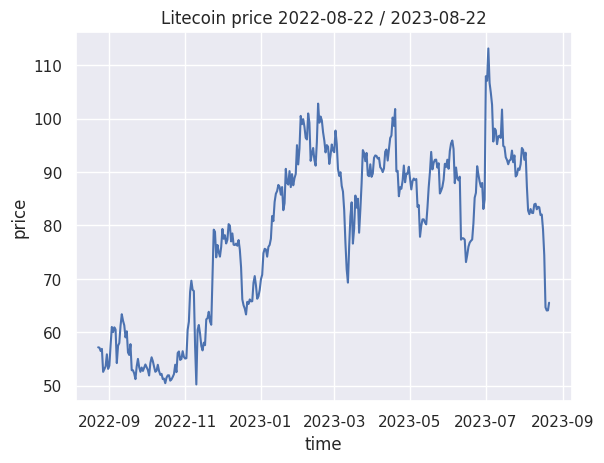

In [23]:
df5 = df[(df['time']> '2022-08-22 00:00:00') & (df['time']<= '2023-08-22 00:00:00')]
sns.lineplot(data=df5, x='time', y='price').set_title(f'{moneda} price 2022-08-22 / 2023-08-22')

Observaciones:
*
*

Text(0.5, 1.0, 'marketcaps vs Circulating supply Litecoin')

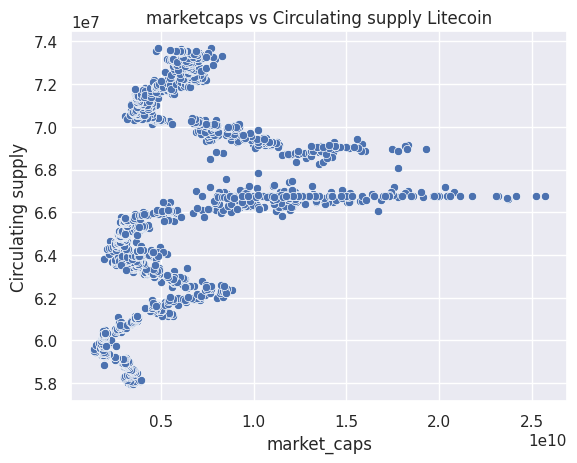

In [26]:
sns.scatterplot(data=df, x='market_caps', y='Circulating supply').set_title(f"marketcaps vs Circulating supply {moneda}")

### *Recordando la relacion precio_actual = market_cap / circulating_supply:*

Esta grafica nos demuestra los momentos donde hubo una mayor cantidad
de tokens en circulacion tambien hubo una baja en la capital de mercado. Este
hecho afecta directamente el precio